# **Download package**

In [ ]:
!pip install underthesea
!pip install gensim

# **Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import re
from underthesea import word_tokenize, sent_tokenize
from gensim.models import Word2Vec
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding
from keras.models import Sequential
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from keras.layers import Embedding, Flatten, Dense, Conv1D, GlobalMaxPooling1D, Dropout
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# **Exercise 2**

## **Read file and Processing data**

In [ ]:
filename = 'facebook_comment_2k7.csv'
df = pd.read_csv(filename)

max = 2700
X = df['text'][:max].astype(str)
y = df['label'][:max]

def clean_data(text):
    processed_text = str(text).lower()
    processed_text = re.sub('\[.*?\]', '', processed_text)
    processed_text = re.sub(r'https?\S+|www\.\S+', '', processed_text)
    processed_text = re.sub('<.*?>+', '', processed_text)
    processed_text = re.sub('\n', ' ', processed_text)
    processed_text = re.sub('\w*\d\w*', '', processed_text)
    processed_text = re.sub(r'[^\w\s-]|(?<!\S)-|-(?!\S)', ' ', processed_text)
    processed_text = re.sub(r'\b\w\b', '', processed_text)
    processed_text = word_tokenize(processed_text, format='text')

    return processed_text

# Áp dụng hàm clean cho từng row trong cột X
Xnew = X.apply(clean_data)

## **Processing labels**

In [ ]:
# Ánh xạ từ nhãn văn bản sang chỉ số số nguyên
label_to_index = {'normal': 0, 'hate_speech': 1, 'harassment': 2, 'sexaully_explixit': 3, 'dangerous_content': 4}

labels_indexed = []
for instance in y:
    # Loại bỏ ngoặc đơn từ chuỗi bằng cách thay thế chúng bằng dấu phẩy và sau đó tách chuỗi thành danh sách
    labels = re.sub(r'[\[\]\']', '', instance).split(', ')
    indexed_labels = [label_to_index[label] for label in labels if label in label_to_index]
    labels_indexed.append(indexed_labels)

# Tạo một MultiLabelBinarizer và fit trên danh sách các nhãn
mlb = MultiLabelBinarizer()
binary_labels = mlb.fit_transform(labels_indexed)   #(2700, 5)

In [ ]:
# # Ánh xạ từ nhãn văn bản sang chỉ số số nguyên
# label_to_index = {'normal': 0, 'hate_speech': 1, 'harassment': 2, 'sexually_explicit': 3, 'dangerous_content': 4}

# Dữ liệu nhãn ban đầu:
# [['normal'], ['hate_speech', 'harassment'], ['sexually_explicit', 'hate_speech'], ['normal'], ['dangerous_content']]

# Ma trận nhãn sau khi mã hóa one-hot:
# [[1 0 0 0 0]
#  [0 1 1 0 0]
#  [0 1 0 1 0]
#  [1 0 0 0 0]
#  [0 0 0 0 1]]

# Danh sách nhãn sau khi chuyển đổi:
# [[0], [1, 2], [3, 1], [0], [4]]

## **Processing data**

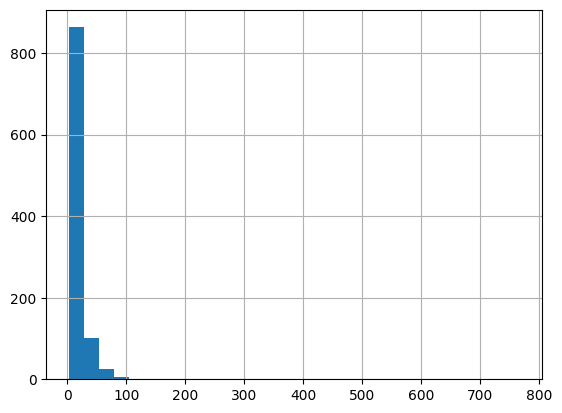

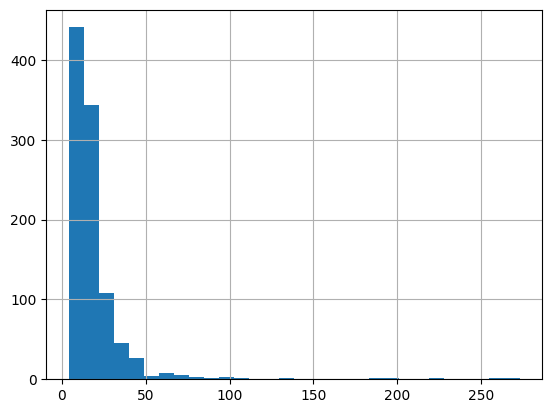

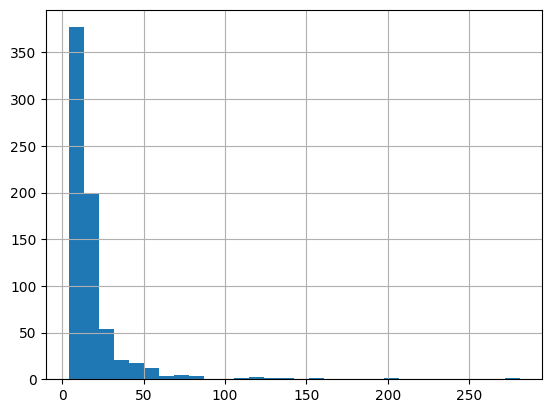

In [ ]:
seq_len = [len(i.split()) for i in Xnew[:1000]]
pd.Series(seq_len).hist(bins=30)
plt.show()

seq_len = [len(i.split()) for i in Xnew[1000:2000]]
pd.Series(seq_len).hist(bins=30)
plt.show()

seq_len = [len(i.split()) for i in Xnew[2000:max]]
pd.Series(seq_len).hist(bins=30)
plt.show()

In [ ]:
tokenizer = Tokenizer(oov_token="OOV")
tokenizer.fit_on_texts(Xnew)
word_index = tokenizer.word_index
print(word_index)

MAX_SEQ_LENGTH=35
MAX_VOCAB_SIZE=len(tokenizer.word_index)+1   # 5263

tokenized_data = tokenizer.texts_to_sequences(Xnew)
vector_data = pad_sequences(tokenized_data, padding="post", maxlen=MAX_SEQ_LENGTH)

X_train, X_test, y_train, y_test = train_test_split(vector_data, binary_labels, test_size=0.25, random_state=42)

{'OOV': 1, 'có': 2, 'cho': 3, 'bạn': 4, 'vay': 5, 'em': 6, 'là': 7, 'thì': 8, 'đi': 9, 'con': 10, 'mà': 11, 'để': 12, 'chị': 13, 'ko': 14, 'không': 15, 'nhé': 16, 'này': 17, 'và': 18, 'cái': 19, 'mình': 20, 'đc': 21, 'anh': 22, 'sẽ': 23, 'làm': 24, 'như': 25, 'cmt': 26, 'chỉ': 27, 'cần': 28, 'nó': 29, 'rồi': 30, 'fan': 31, 'mày': 32, 'mẹ': 33, 'cứng': 34, 'người': 35, 'lại': 36, 'được': 37, 'vào': 38, 'ng': 39, 'đã': 40, 'còn': 41, 'của': 42, 'nguyễn': 43, 'nào': 44, 'tiền': 45, 'cũng': 46, 'thành': 47, 'ra': 48, 'nói': 49, 'trong': 50, 'với': 51, 'ngu': 52, 'gì': 53, 'thằng': 54, 'xem': 55, 'tin': 56, 'đây': 57, 'từ': 58, 'đến': 59, 'ai': 60, 'thế': 61, 'nha': 62, 'đó': 63, 'tư': 64, 'về': 65, 'đăng': 66, 'phải': 67, 'hàng': 68, 'biết': 69, 'đâu': 70, 'phí': 71, 'dạo': 72, 'nhanh': 73, 'ngày': 74, 'vấn': 75, 'bên': 76, 'thể': 77, 'ăn': 78, 'mấy': 79, 'khi': 80, 'lên': 81, 'nhà': 82, 'luôn': 83, 'mới': 84, 'sau': 85, 'co': 86, 'chi': 87, 'vậy': 88, 'thấy': 89, 'trợ': 90, 'qua': 91, 'mu

## **Embedding**

In [ ]:
# # Tokenize các câu trong Xnew
# X_tokenized = [word_tokenize(sentence) for sentence in Xnew]
# # Huấn luyện mô hình CBOW
# model_cbow = Word2Vec(sentences=X_tokenized, window=5, sg=0, min_count=1, epochs=150)
# #save trained model
# model_cbow.save("/content/cbow_data.model")

#load model
model = Word2Vec.load("cbow_data.model")
#key of vocab
vocab = model.wv.index_to_key           # 8874
#vector embedding
embeddings = model.wv.vectors           # (8874, 100)
# Số chiều của vector nhúng
EMBEDDING_DIM = model.vector_size       # 100

# Tạo ma trận trọng số embedding
embedding_matrix = np.zeros((MAX_VOCAB_SIZE, EMBEDDING_DIM))   # (5263, 100)

for word, i in word_index.items():
    try:
      embedding_vector = model.wv[word]
      embedding_matrix[i] = embedding_vector
    except KeyError:
      embedding_matrix[i] = np.random.normal(0,np.sqrt(0.25), EMBEDDING_DIM)

# Tạo lớp nhúng trong mô hình của bạn
embedding_layer = Embedding(input_dim=MAX_VOCAB_SIZE,
                            output_dim=EMBEDDING_DIM,
                            input_length=MAX_SEQ_LENGTH,
                            weights=[embedding_matrix],
                            trainable=False)

## **Simple Neural Network**

In [ ]:
# Khởi tạo một mô hình Sequential
snn_model = Sequential()
snn_model.add(embedding_layer)

# Chuyển từ ma trận 2D sang vector 1D để phù hợp với lớp Dense
snn_model.add(Flatten())

# snn_model.add(Dropout(0.5))
# snn_model.add(Dense(32, activation='relu'))

snn_model.add(Dense(len(label_to_index), activation='softmax'))
snn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
snn_model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 35, 100)           526300    
                                                                 
 flatten_11 (Flatten)        (None, 3500)              0         
                                                                 
 dense_33 (Dense)            (None, 5)                 17505     
                                                                 
Total params: 543805 (2.07 MB)
Trainable params: 17505 (68.38 KB)
Non-trainable params: 526300 (2.01 MB)
_________________________________________________________________


In [ ]:
# Huấn luyện mô hình
snn_model_history = snn_model.fit(X_train, y_train, epochs=6, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/6
16/16 [==============================] - 1s 18ms/step - loss: 1.6305 - accuracy: 0.4657 - val_loss: 1.1586 - val_accuracy: 0.6326
Epoch 2/6
16/16 [==============================] - 0s 7ms/step - loss: 0.8061 - accuracy: 0.7427 - val_loss: 0.9311 - val_accuracy: 0.7319
Epoch 3/6
16/16 [==============================] - 0s 6ms/step - loss: 0.5579 - accuracy: 0.8286 - val_loss: 0.8809 - val_accuracy: 0.7526
Epoch 4/6
16/16 [==============================] - 0s 6ms/step - loss: 0.4378 - accuracy: 0.8760 - val_loss: 0.8762 - val_accuracy: 0.7659
Epoch 5/6
16/16 [==============================] - 0s 6ms/step - loss: 0.3607 - accuracy: 0.9022 - val_loss: 0.8846 - val_accuracy: 0.7719
Epoch 6/6
16/16 [==============================] - 0s 6ms/step - loss: 0.3125 - accuracy: 0.9225 - val_loss: 0.8979 - val_accuracy: 0.7778


In [ ]:
# Đánh giá mô hình
score= snn_model.evaluate(X_test, y_test, verbose=1)
# In ra độ chính xác
print("Loss: ", score[0])
print("Accuracy: ", score[1])

22/22 [==============================] - 0s 2ms/step - loss: 0.8979 - accuracy: 0.7778
Loss:  0.8978865742683411
Accuracy:  0.7777777910232544


In [ ]:
def create_chart(model_history):
  plt.plot(model_history.history['accuracy'])
  plt.plot(model_history.history['val_accuracy'])

  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','test'], loc='upper right')
  plt.show()

  plt.plot(model_history.history['loss'])
  plt.plot(model_history.history['val_loss'])

  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','test'], loc='upper right')
  plt.show()

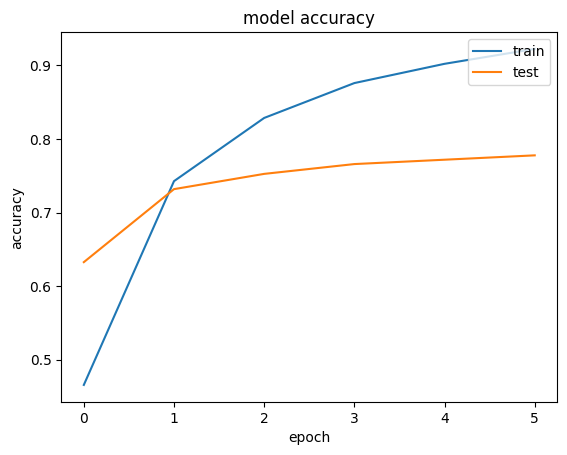

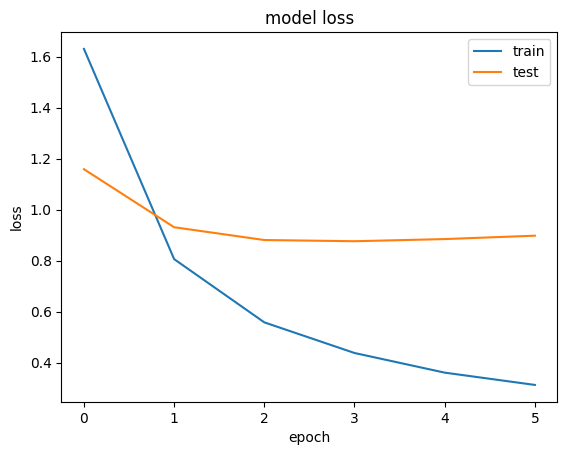

In [ ]:
create_chart(snn_model_history)

In [ ]:
def predict_labels(sentences, model):
    predicted_labels_list = []
    for sentence in sentences:
        processed_sentence = clean_data(sentence)
        tokenized_sentence = tokenizer.texts_to_sequences([processed_sentence])
        padded_sentence = pad_sequences(tokenized_sentence, padding="post", maxlen=MAX_SEQ_LENGTH)

        predictions = model.predict(padded_sentence)
        threshold = 0.4
        predicted_labels = [label for label, prob in label_to_index.items() if predictions[0][prob] > threshold]

        if not predicted_labels:
            predicted_labels = ['normal']
        predicted_labels_list.append(predicted_labels)

    return predicted_labels_list

In [ ]:
predict_labels(["cái đệch mẹ mày con điên kia",
                "đù phim này hay vãi :v đáng xem nhơ",
                "t chỉ cho tụi m vay trả góp lãi suất 0.2% liên hệ sdt 083993494, đệch mẹ k cần cmnd atm dm đứa nào ngu mới không vào"], snn_model)

1/1 [==============================] - 0s 139ms/step


[['normal'], ['normal'], ['hate_speech', 'dangerous_content']]

In [ ]:
# Chuỗi câu cụ thể bạn muốn kiểm tra
test_sentence = "t chỉ cho tụi m vay trả góp lãi suất 0.2% liên hệ sdt 083993494, đệch mẹ k cần cmnd atm dm đứa nào ngu mới không vào"
processed_sentence = clean_data(test_sentence)
tokenized_sentence = tokenizer.texts_to_sequences([processed_sentence])
padded_sentence = pad_sequences(tokenized_sentence, padding="post", maxlen=MAX_SEQ_LENGTH)
predictions = snn_model.predict(padded_sentence)

# In ra label và xác suất của từng label
for label, prob in label_to_index.items():
    print(f"Label: {label}, Probability: {predictions[0][prob]}")
threshold = 0.4
predicted_labels = [label for label, prob in label_to_index.items() if predictions[0][prob] > threshold]
print("Predicted labels:", predicted_labels)

1/1 [==============================] - 0s 38ms/step
Label: normal, Probability: 0.0006697060307487845
Label: hate_speech, Probability: 0.516480028629303
Label: harassment, Probability: 0.009030329063534737
Label: sexaully_explixit, Probability: 0.0005469146417453885
Label: dangerous_content, Probability: 0.47327303886413574
Predicted labels: ['hate_speech', 'dangerous_content']


## **Convaluation Neural Network**

In [ ]:
# Khởi tạo một Sequential model
cnn_model = Sequential()
cnn_model.add(embedding_layer)

# Thêm lớp Convolutional
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
# Thêm lớp Global Max Pooling
cnn_model.add(GlobalMaxPooling1D())
# Thêm lớp Dense (Fully Connected Layer) để phân loại
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dropout(0.5))

cnn_model.add(Dense(5, activation='softmax'))

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 35, 100)           526300    
                                                                 
 conv1d_8 (Conv1D)           (None, 31, 128)           64128     
                                                                 
 global_max_pooling1d_8 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_34 (Dense)            (None, 32)                4128      
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 dense_35 (Dense)            (None, 5)                 165       
                                                     

In [ ]:
# Huấn luyện mô hình
cnn_model_history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
16/16 [==============================] - 2s 76ms/step - loss: 2.2717 - accuracy: 0.4069 - val_loss: 1.1028 - val_accuracy: 0.6267
Epoch 2/10
16/16 [==============================] - 1s 53ms/step - loss: 1.1883 - accuracy: 0.6074 - val_loss: 0.9361 - val_accuracy: 0.7081
Epoch 3/10
16/16 [==============================] - 1s 40ms/step - loss: 1.0274 - accuracy: 0.6652 - val_loss: 0.8443 - val_accuracy: 0.7615
Epoch 4/10
16/16 [==============================] - 0s 31ms/step - loss: 0.9033 - accuracy: 0.6983 - val_loss: 0.8011 - val_accuracy: 0.7778
Epoch 5/10
16/16 [==============================] - 0s 31ms/step - loss: 0.7871 - accuracy: 0.7417 - val_loss: 0.7469 - val_accuracy: 0.7941
Epoch 6/10
16/16 [==============================] - 1s 33ms/step - loss: 0.7498 - accuracy: 0.7407 - val_loss: 0.7249 - val_accuracy: 0.8015
Epoch 7/10
16/16 [==============================] - 0s 31ms/step - loss: 0.6943 - accuracy: 0.7546 - val_loss: 0.7257 - val_accuracy: 0.8059
Epoch 8/10
16

In [ ]:
# Đánh giá mô hình
score= cnn_model.evaluate(X_test, y_test, verbose=1)
# In ra độ chính xác
print("Loss: ", score[0])
print("Accuracy: ", score[1])

22/22 [==============================] - 0s 4ms/step - loss: 0.7109 - accuracy: 0.8133
Loss:  0.7109183073043823
Accuracy:  0.8133333325386047


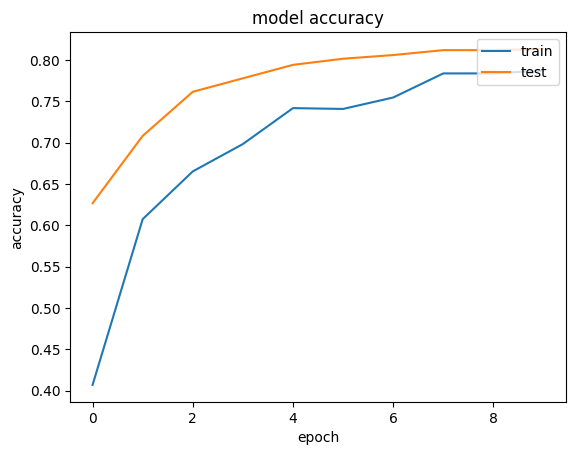

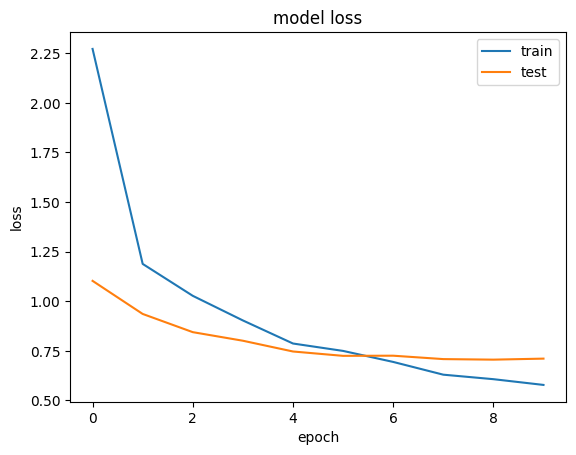

In [ ]:
create_chart(cnn_model_history)

In [ ]:
predict_labels(["các đệch mẹ mày con điên kia",
                "đù phim này hay vãi :v đáng xem nhơ",
                "t chỉ cho tụi m vay trả góp lãi suất 0.2% liên hệ sdt 083993494, đệch mẹ k cần cmnd atm dm đứa nào ngu mới không và"], cnn_model)

1/1 [==============================] - 0s 35ms/step


[['hate_speech'], ['normal'], ['dangerous_content']]

## **Encoding**

## **NB, SVM, DT, KNN, RF**

In [ ]:
# Tạo một đối tượng TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Biểu diễn văn bản dưới dạng ma trận TF-IDF
tfidf_X = tfidf_vectorizer.fit_transform(Xnew)
print(tfidf_vectorizer.vocabulary_)

# In ra ma trận TF-IDF
print(tfidf_X.toarray().shape)

{'noi': 4985, 'cho': 827, 'biet': 248, 'rãnh': 5715, 'viet': 7564, 'voi': 7603, 'loai': 3508, 'ng': 4359, 'nhu_chị': 4800, 'cùng': 1433, 'não': 5029, 'ngắn': 4695, 'như': 4880, 'bảo': 517, 'thoi': 6333, 'bt': 336, 'thi': 6274, 'im': 2926, 'đừng': 8655, 'khoe': 3053, 'xau': 7846, 'ho': 2492, 'giải_ngân_cực': 2224, 'nhanh': 4753, 'mức': 4286, 'vay': 7514, 'lên': 3671, 'đến': 8541, 'duyệt': 1810, 'tự_động': 7423, 'nhanh_chóng': 4754, 'cần': 1514, 'cmnd': 1153, 'atm': 143, 'hỗ_trợ': 2877, 'toàn_quốc': 6803, 'thẩm_định': 6556, 'gọi': 2342, 'người_thân': 4674, 'ai': 29, 'đăng_ký': 8438, 'tại': 7289, 'đây': 8377, 'thủ_tục': 6642, 'đơn_giản': 8451, 'khoản': 3060, 'giải_ngân': 2223, 'liền': 3488, 'tay': 6177, 'theo': 6267, 'link': 3461, 'bên': 429, 'dưới': 1890, 'săn': 6053, 'mãi': 4088, 'con': 1240, 'đen': 8240, 'cả': 1489, 'tối': 7359, 'đc': 8226, 'an_ủi': 81, 'be': 208, 'hjjjj': 2484, 'zalo': 8044, 'ae': 17, 'nào': 5020, 'mua': 4012, 'kết_bạn': 3299, 'đặt_hàng': 8528, 'uy_tín': 7457, 'tiền':

In [ ]:
# Khởi tạo các mô hình
models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'kNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [ ]:
# Huấn luyện các mô hình và đánh giá độ chính xác
accuracies = {}
def traning_model_by_type_text_mode(X_train, X_test, y_train, y_test):
  for name, model in models.items():
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      accuracy = accuracy_score(y_test, y_pred)

      accuracies[name] = accuracy

def create_table_compare_accurary():
  # Tạo DataFrame từ từ điển accuracies
  df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])

  # Sắp xếp giảm dần theo độ chính xác
  df = df.sort_values(by='Accuracy', ascending=False)
  # In bảng so sánh độ chính xác của các mô hình
  print(df)

def create_chart():
  # Vẽ biểu đồ so sánh độ chính xác của các mô hình
  plt.figure(figsize=(8, 4))
  plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
  plt.xlabel('Models')
  plt.ylabel('Accuracy')
  plt.title('Comparison of Model Accuracies')
  plt.ylim(0, 1)

  bars = plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')

  for bar in bars:
      height = bar.get_height()
      plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}', ha='center', va='bottom')

  plt.show()

           Model  Accuracy
4  Random Forest  0.835556
1            SVM  0.801481
3            kNN  0.791111
2  Decision Tree  0.779259
0    Naive Bayes  0.712593


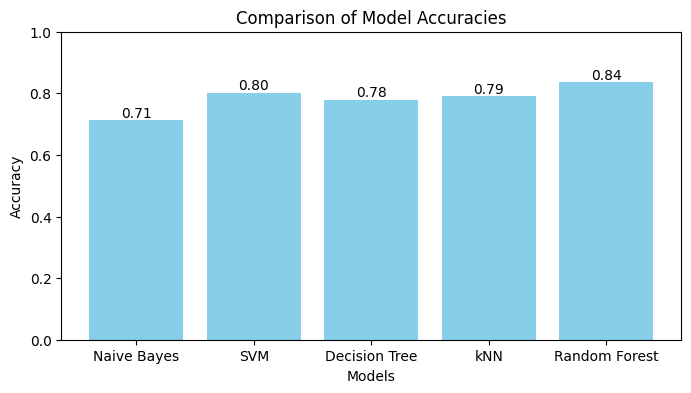

In [ ]:
y_labels = np.argmax(binary_labels, axis=1)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(tfidf_X, y_labels, test_size=0.25, random_state=42)
traning_model_by_type_text_mode(X_train_1, X_test_1, y_train_1, y_test_1)
create_table_compare_accurary()
create_chart()

In [ ]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train_1, y_train_1)
y_pred_1 = model_RF.predict(X_test_1)
print(classification_report(y_test_1 ,y_pred_1))

def predict_sentences(sentences):
    tfidf_sentences = tfidf_vectorizer.transform(sentences)
    predictions = model.predict(tfidf_sentences)
    return predictions

def predict_labels(sentences, model):
    predicted_labels_list = []
    for sentence in sentences:
        processed_sentence = clean_data(sentence)
        tfidf_sentences = tfidf_vectorizer.transform([processed_sentence])
        predictions = model.predict(tfidf_sentences)

        # Chuyển đổi chỉ số sang tên nhãn
        predicted_labels = [list(label_to_index.keys())[list(label_to_index.values()).index(prediction)] for prediction in predictions]
        predicted_labels_list.append(predicted_labels)

    return predicted_labels_list

predict_labels(["các đệch mẹ mày con điên kia",
                "đù phim này hay vãi :v đáng xem nhơ",
                "t chỉ cho tụi m vay trả góp lãi suất 0.2% liên hệ sdt 083993494, đệch mẹ k cần cmnd atm dm đứa nào ngu mới không vào"], model_RF)

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       404
           1       0.82      0.63      0.71       126
           2       0.50      0.07      0.12        28
           3       0.94      0.30      0.45        50
           4       1.00      0.88      0.94        67

    accuracy                           0.83       675
   macro avg       0.81      0.58      0.62       675
weighted avg       0.82      0.83      0.80       675



[['hate_speech'], ['normal'], ['dangerous_content']]